In [2]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
from random import randint, seed
from enum import Enum

class Strategies(Enum):
    GARDER = 2 
    CHANGER = 1
    

    
def play_monty_hall(strategie):
    portes = [0,1,2]
    porte_choisi_init = randint(0, 2)
    b_porte = randint(0, 2)
    
    if (porte_choisi_init == b_porte):
        portes.remove(randint(0, 1))
    else:
        portes = [b_porte]
    
    porte_choisi = 0
    
    if (strategie == Strategies.GARDER):
        porte_choisi = porte_choisi_init
    elif (strategie == Strategies.CHANGER):
        porte_choisi = portes[0]
    else:
        raise ValueError("strategie inconnu")
        
    return porte_choisi == b_porte
    
    



In [11]:
play_monty_hall(Strategies.GARDER)

True

In [20]:
def game_response(strategie, nb_partie):
    return [1 if play_monty_hall(strategie) else 0 for i in range(nb_partie)]
game_response(Strategies.GARDER, 10)

[0, 0, 1, 0, 0, 1, 1, 0, 0, 0]

In [34]:
sum(game_response(Strategies.GARDER, 50))

15

In [29]:
sum(game_response(Strategies.CHANGER, 50))

38

Text(0.5, 0, 'nb tours ')

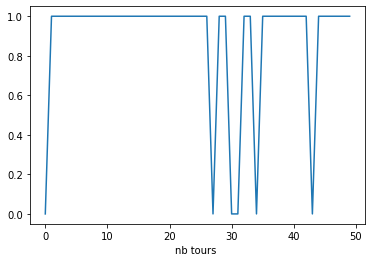

In [40]:
plot = plt.plot(game_response(Strategies.CHANGER, 50))
plt.xlabel('nb tours ')


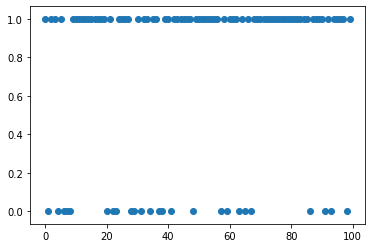

In [43]:
plot = plt.scatter(range(100), game_response(Strategies.CHANGER, 100))

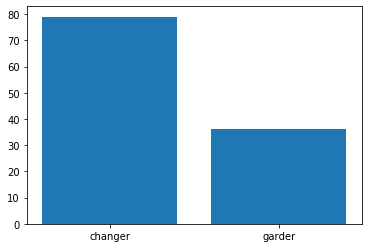

In [49]:
plot = plt.bar([1,2], [sum(game_response(Strategies.CHANGER, 100)),sum(game_response(Strategies.GARDER, 100))], tick_label=["changer","garder"])


In [50]:
gains_changer=[]
gains_garder=[]
samples= [10000,4000,5000,7000,2000]
for tours in samples:
    gains_changer.append(game_response(Strategies.CHANGER, tours))
    gains_garder.append(game_response(Strategies.GARDER, tours))
    

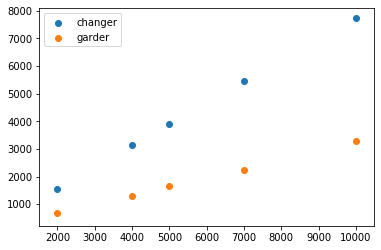

In [56]:
figure = plt.figure()
plot = plt.scatter(samples, [sum(x) for x in gains_changer])
plot = plt.scatter(samples, [sum(x) for x in gains_garder])
plt.legend(['changer', 'garder'])

In [60]:
[sum(y) for y in gains_changer]

[7733, 3139, 3914, 5475, 1549]